# Daugman Algorithm demo

## Imports & prerequisites

In [1]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from utils import *

In [2]:
base_dirs = {
        "images": "data/images",
        "extracted_irises": "data/extracted_irises",
        "irises": "data/irises",
        "pupils": "data/pupils",
    }

extracted_irises_dir = base_dirs["extracted_irises"]

## Sample image loaded

(470, 1410)

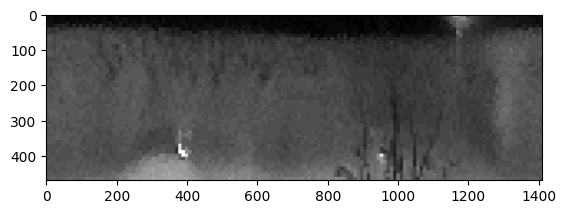

In [3]:
sample_image = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
plt.imshow(sample_image, cmap="gray")
sample_image.shape

### Split into 8 rows

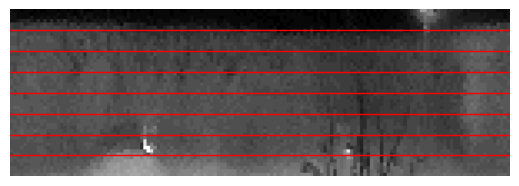

In [4]:
plt.figure(figsize=(5, 15))
plt.imshow(sample_image, cmap="gray")

height, width = sample_image.shape[:2]
row_height = height / 8

for i in range(1, 8):
    y_position = i * row_height
    plt.axhline(y=y_position, color='r', linestyle='-', linewidth=1)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### bands

Image dimensions: 470x1410


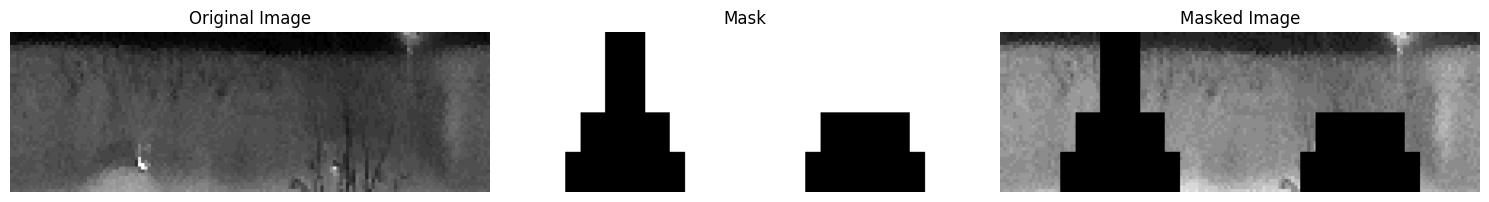

Mask shape: (470, 1410)
Percentage of mask that is True: 74.09%


In [5]:
masked_image, full_mask = create_and_visualize_mask(sample_image)

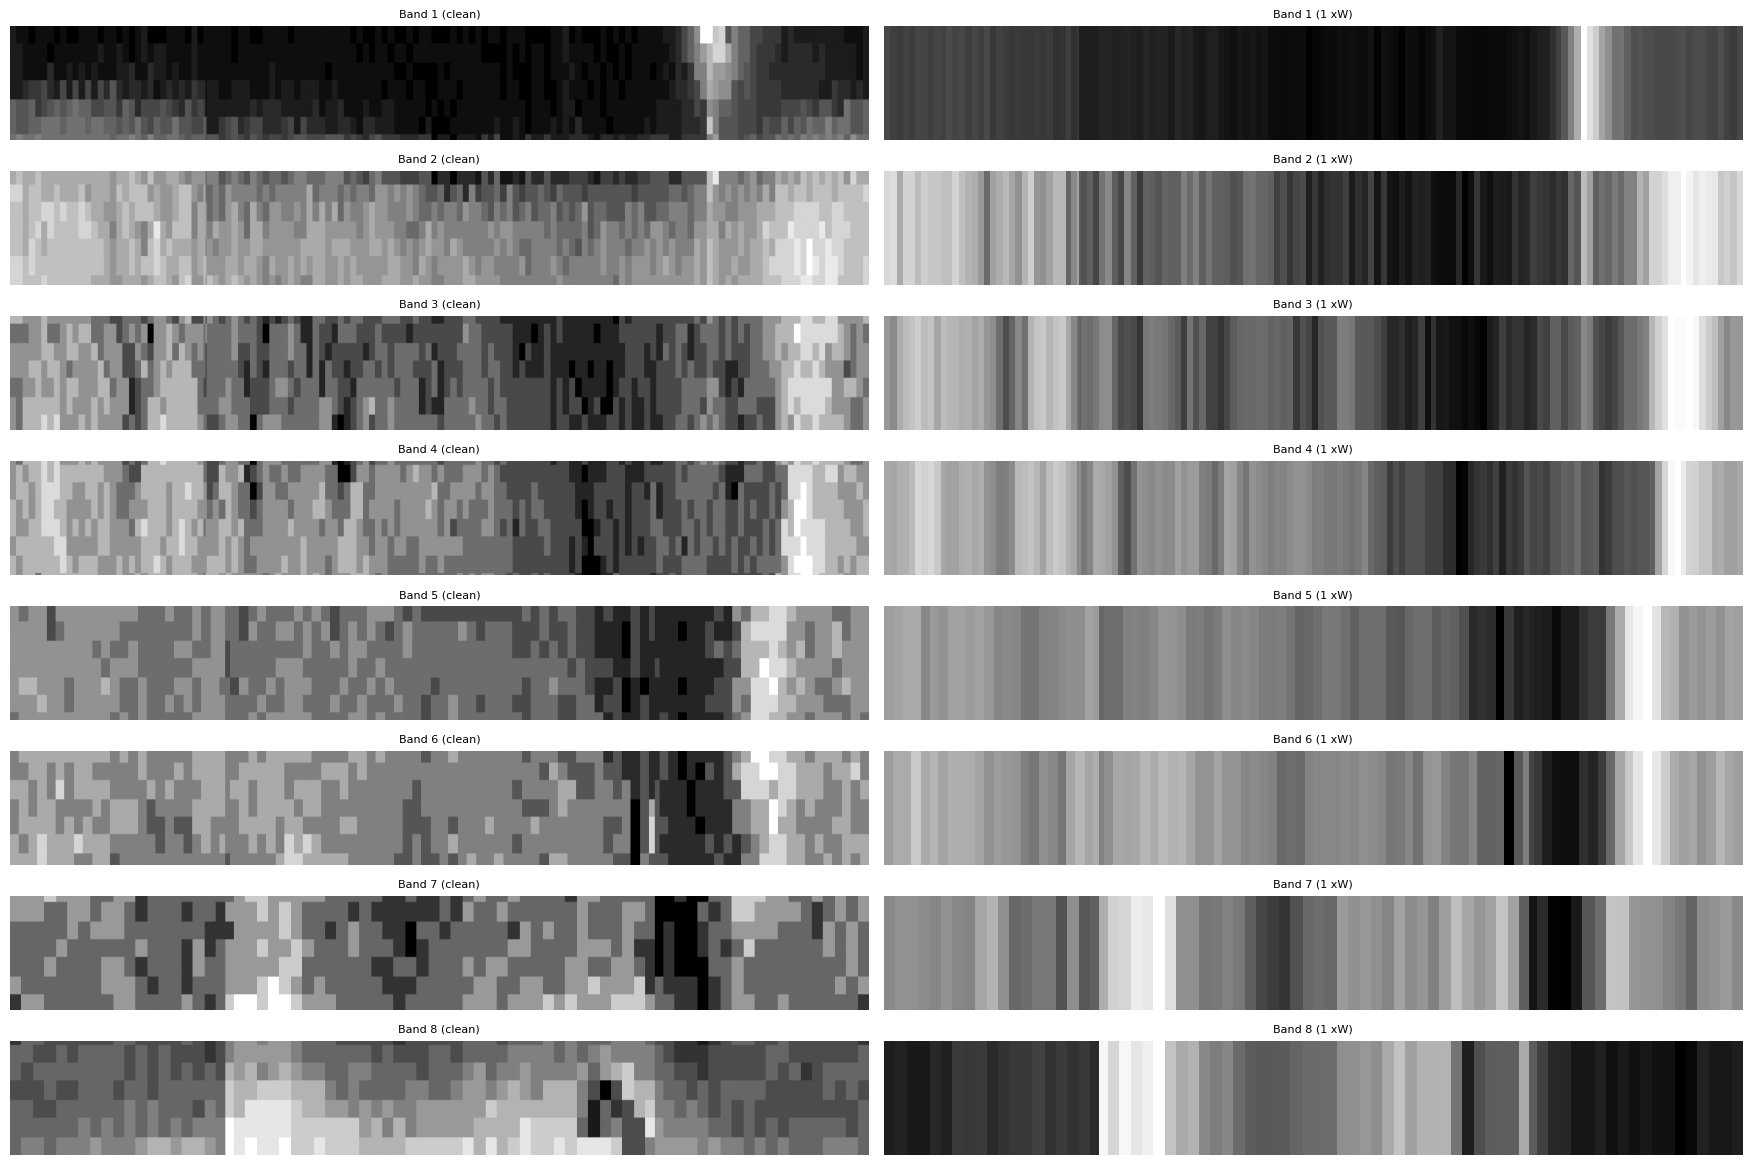

In [6]:
rows_list, collapsed = bands_with_collapse(sample_image, full_mask, plot=True)

### Gabor decomposition

In [7]:
coeffs_per_band = []
bits_per_band   = []

for band_idx, row in enumerate(rows_list):
    coeffs, bits = gabor_decompose_row(row, num_coeffs=16)
    coeffs_per_band.append(coeffs)
    bits_per_band.append(bits)

print(bits_per_band[0])

['01', '01', '01', '01', '01', '00', '00', '00', '00', '00', '00', '10', '10', '10', '10', '10']


(16, 128)


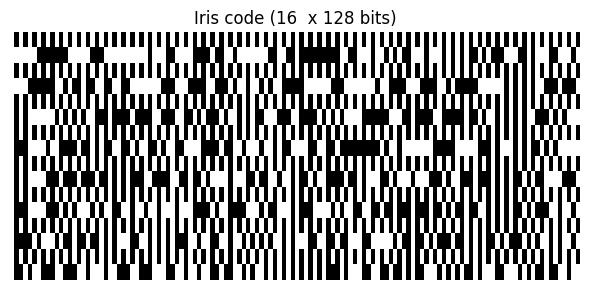

<module 'matplotlib.pyplot' from 'c:\\nextcloud\\Studia - PW\\semestr 6\\biometria\\projekt2\\Iris\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
iris_code = build_iris_code(rows_list, num_coeffs=128)
print(iris_code.shape)
plot_iris_code(iris_code)

# Comparison

We'll take the same person, but 2 different pupils - right and left, and we'll see who similar/different they are

## same person

Image dimensions: 470x1410
Image dimensions: 470x1410
Number of differences: 487 out of 2048 bits
Percentage of differences: 23.78%


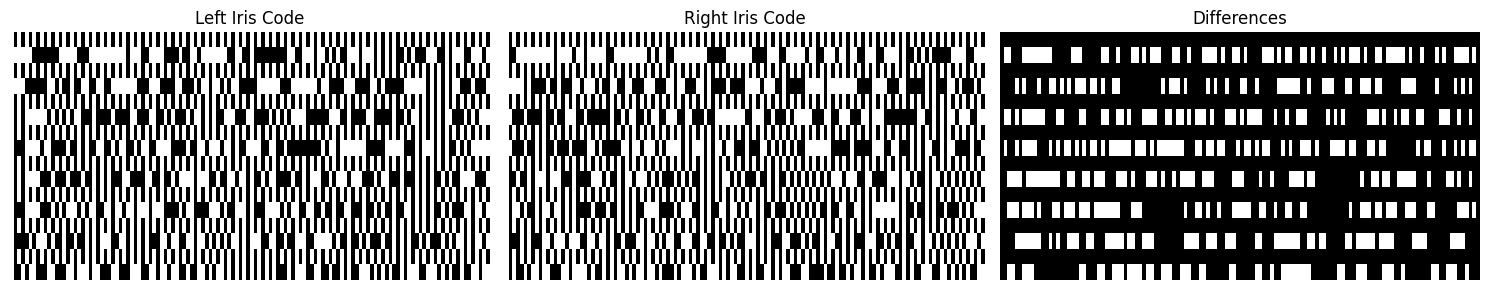

<module 'matplotlib.pyplot' from 'c:\\nextcloud\\Studia - PW\\semestr 6\\biometria\\projekt2\\Iris\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1500x300 with 0 Axes>

In [9]:
left_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
right_iris = imread("data/extracted_irises/right/38-1.png")[:, :, 0]

left_code = image_to_iris_code(left_iris)
right_code = image_to_iris_code(right_iris)

compare_codes(left_code, right_code)

## different person

Image dimensions: 470x1410
Image dimensions: 470x1410
Number of differences: 506 out of 2048 bits
Percentage of differences: 24.71%


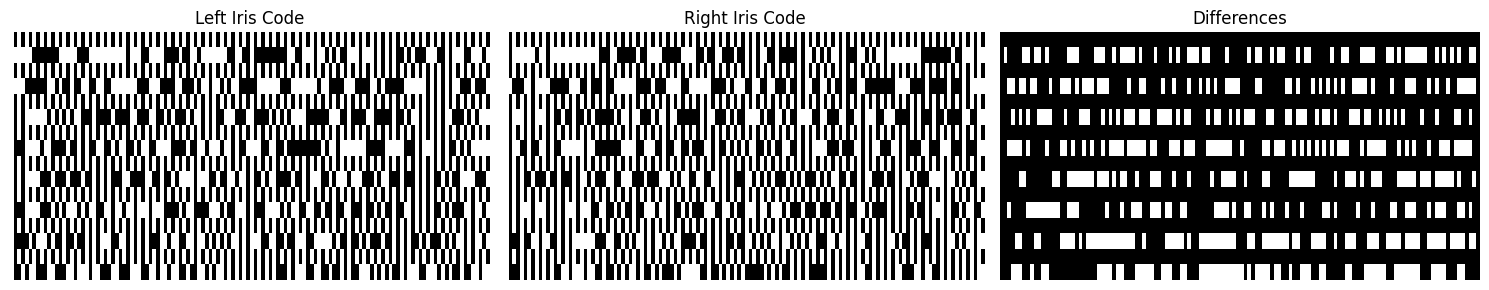

<module 'matplotlib.pyplot' from 'c:\\nextcloud\\Studia - PW\\semestr 6\\biometria\\projekt2\\Iris\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1500x300 with 0 Axes>

In [10]:
person_1_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/right/37-1.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

## same person, same eye

Image dimensions: 470x1410
Image dimensions: 470x1410
Number of differences: 366 out of 2048 bits
Percentage of differences: 17.87%


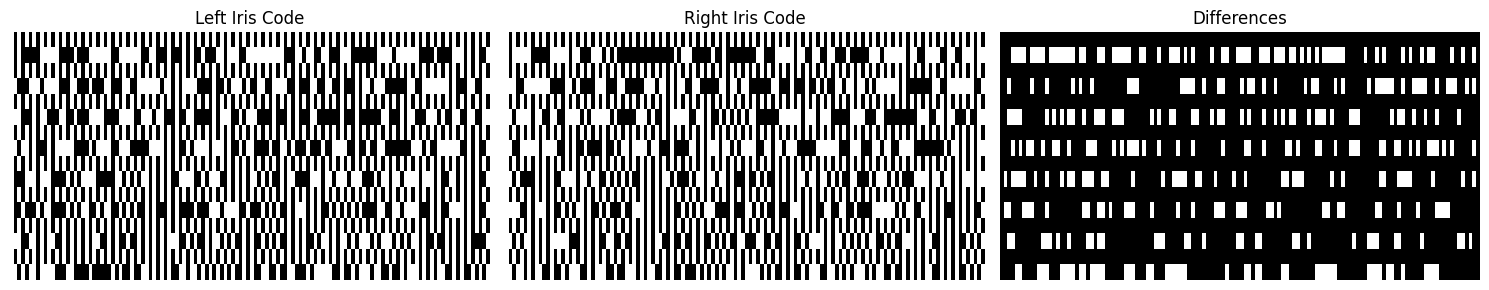

<module 'matplotlib.pyplot' from 'c:\\nextcloud\\Studia - PW\\semestr 6\\biometria\\projekt2\\Iris\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1500x300 with 0 Axes>

In [11]:
person_1_iris = imread("data/extracted_irises/left/17-3.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/left/17-4.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

Processing: 1-1.png
Image dimensions: 470x1410
Processing: 1-2.png
Image dimensions: 470x1410
Processing: 1-3.png
Image dimensions: 470x1410
Processing: 1-4.png
Image dimensions: 470x1410
Processing: 1-5.png
Image dimensions: 470x1410
Processing: 10-1.png
Image dimensions: 470x1410
Processing: 10-2.png
Image dimensions: 470x1410
Processing: 10-3.png
Image dimensions: 470x1410
Processing: 10-4.png
Image dimensions: 470x1410
Processing: 10-5.png
Image dimensions: 470x1410
Hamming distance between 1-1.png and 1-1.png: 0.0000
Hamming distance between 1-1.png and 1-2.png: 0.1704
Hamming distance between 1-1.png and 1-3.png: 0.1611
Hamming distance between 1-1.png and 1-4.png: 0.1802
Hamming distance between 1-1.png and 1-5.png: 0.1953
Hamming distance between 1-1.png and 10-1.png: 0.2490
Hamming distance between 1-1.png and 10-2.png: 0.2290
Hamming distance between 1-1.png and 10-3.png: 0.2246
Hamming distance between 1-1.png and 10-4.png: 0.2324
Hamming distance between 1-1.png and 10-5.pn

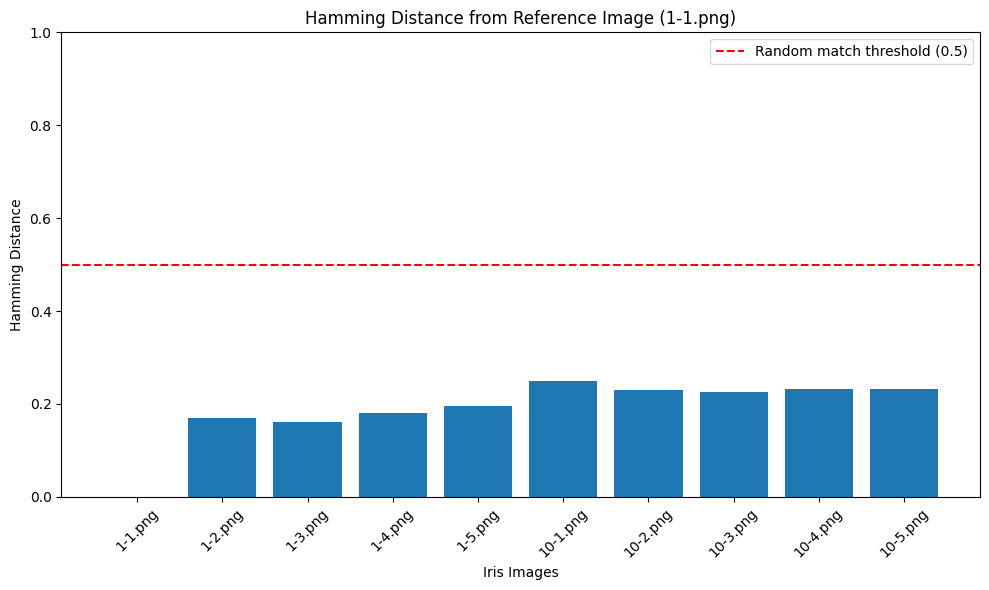

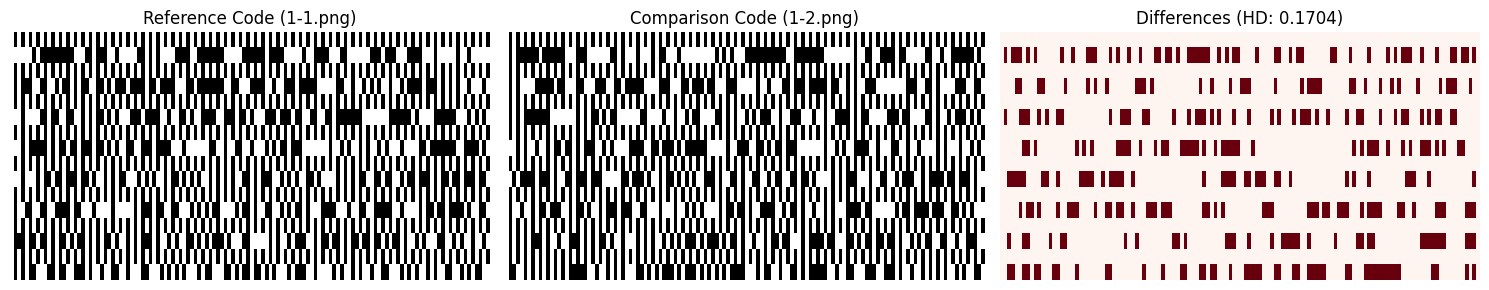

In [16]:
iris_codes = []
filenames = []

# Process the first 5 iris images
for filename in os.listdir(extracted_irises_dir+"/left")[:10]:
    if filename.endswith(".png"):
        print(f"Processing: {filename}")
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        iris_code = image_to_iris_code(image)
        iris_codes.append(iris_code)
        filenames.append(filename)

# Calculate Hamming distances between the first iris code and all others
if iris_codes:
    reference_code = iris_codes[0]
    distances = []
    
    # Calculate distances and print them
    for i, code in enumerate(iris_codes):
        distance = hamming_distance(reference_code, code)
        distances.append(distance)
        print(f"Hamming distance between {filenames[0]} and {filenames[i]}: {distance:.4f}")
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random match threshold (0.5)')
    plt.xticks(range(len(distances)), filenames, rotation=45)
    plt.xlabel('Iris Images')
    plt.ylabel('Hamming Distance')
    plt.title(f'Hamming Distance from Reference Image ({filenames[0]})')
    plt.ylim(0, 1)  # Hamming distance is between 0 and 1
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Also visualize a comparison between the reference code and one other code
    if len(iris_codes) > 1:
        # Import the function we created earlier or define it here
        def plot_iris_code_comparison(left_code, right_code, cmap="gray"):
            """
            Visualise the comparison between two iris codes.
            Shows left code, right code, and their differences.
            """
            # Calculate the differences between the codes
            differences = left_code != right_code
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 3))
            
            # Plot reference code
            axes[0].imshow(left_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[0].set_title(f'Reference Code ({filenames[0]})')
            axes[0].axis("off")
            
            # Plot second code
            axes[1].imshow(right_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[1].set_title(f'Comparison Code ({filenames[1]})')
            axes[1].axis("off")
            
            # Plot differences
            axes[2].imshow(differences, cmap="Reds", aspect="auto", interpolation="nearest")
            axes[2].set_title(f'Differences (HD: {hamming_distance(left_code, right_code):.4f})')
            axes[2].axis("off")
            
            plt.tight_layout()
            plt.show()
        
        # Compare reference code with the second code
        plot_iris_code_comparison(reference_code, iris_codes[1])